# Erect the Fence

You are given an array trees where trees[i] = [xi, yi] represents the location of a tree in the garden.

Fence the entire garden using the minimum length of rope, as it is expensive. The garden is well-fenced only if all the trees are enclosed.

Return the coordinates of trees that are exactly located on the fence perimeter. You may return the answer in any order.

 

**Example 1:**

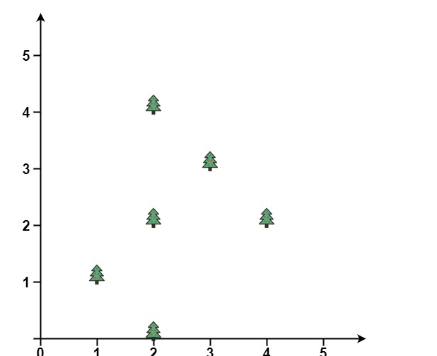

Input: trees = [[1,1],[2,2],[2,0],[2,4],[3,3],[4,2]]

Output: [[1,1],[2,0],[4,2],[3,3],[2,4]]

Explanation: All the trees will be on the perimeter of the fence except the tree at [2, 2], which will be inside the fence.

**Example 2:**

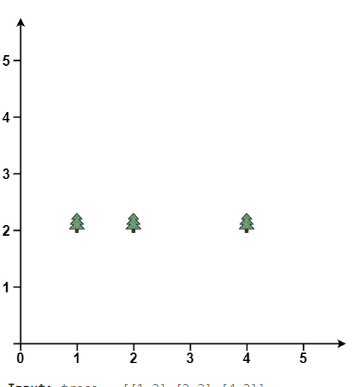

Input: trees = [[1,2],[2,2],[4,2]]

Output: [[4,2],[2,2],[1,2]]

Explanation: The fence forms a line that passes through all the trees.
 

**Constraints:**

- 1 <= trees.length <= 3000
- trees[i].length == 2
- 0 <= xi, yi <= 100
- All the given positions are unique.

In [1]:
from typing import List

def orientation(p, q, r):
    """ 
    To find the orientation of the ordered triplet (p, q, r).
    The function returns following values:
    0 --> p, q and r are colinear
    1 --> Clockwise
    2 --> Counterclockwise
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0  # colinear
    elif val > 0:
        return 1  # clockwise
    else:
        return 2  # counterclockwise

def convex_hull(trees: List[List[int]]) -> List[List[int]]:
    """
    Returns the points that form the convex hull of a set of points (trees).
    """
    # Find the tree with the lowest y-coordinate, breaking ties with x-coordinate
    n = len(trees)
    if n < 3:
        return trees

    # Find the tree with the lowest y-coordinate, breaking ties by x-coordinate
    start = min(trees, key=lambda k: (k[1], k[0]))
    trees.pop(trees.index(start))

    # Sort the trees based on the angle they and the start tree make with the x-axis
    trees.sort(key=lambda p: (orientation(start, p, [start[0] + 1, start[1]]), 
                              (p[0] - start[0]) ** 2 + (p[1] - start[1]) ** 2))

    # Initialize hull with the starting point and first tree
    hull = [start, trees[0]]

    # Process remaining trees
    for t in trees[1:]:
        while len(hull) > 1 and orientation(hull[-2], hull[-1], t) != 2:
            hull.pop()
        hull.append(t)

    return hull

# Example 1
trees1 = [[1,1],[2,2],[2,0],[2,4],[3,3],[4,2]]
# Example 2
trees2 = [[1,2],[2,2],[4,2]]

output1 = convex_hull(trees1)
output2 = convex_hull(trees2)

print(output1, output2)



[[2, 0], [4, 2], [2, 4]] [[1, 2], [4, 2]]
